# PCA

Необходимо сузить пространство признаков так, чтобы:
  * размерность была меньше
  * новые признаки не зависели друг от друга
  * данные разной природы находились как можно дальше друг от друга

Имея на руках эти условия, можно свести задачу о главных компонентах к задаче диагонализации ковариационной матрицы.

Ковариационная матрица — это матрица, составленная из попарных ковариаций элементов двух случайных векторов $\mathbf{X}$ и $\mathbf{Y}$:
$$
\mathrm {cov} (\mathbf {X} ,\mathbf {Y} )=\mathbb {E} \left[(\mathbf {X} -\mathbb {E} \mathbf {X} )(\mathbf {Y} -\mathbb {E} \mathbf {Y} )^{\top }\right]
$$

Тогда для одного случайного вектора:
$$
\mathrm {cov} (\mathbf {X}, \mathbf {X} )=\mathrm {cov} (\mathbf {X} )=\mathbb {E} \left[\mathbf {X} \mathbf {X} ^{\top }\right]-\mathbb {E} [\mathbf {X} ]\cdot \mathbb {E} \left[\mathbf {X} ^{\top }\right]
$$

Поскольку в задачах о главных компонентах подразумевается, что
$$
\mathbb{E}(\mathbf{X}) = 0
$$
получаем
$$
\mathrm {cov} (\mathbf {X} )=\mathbb {E} \left[\mathbf {X} \mathbf {X} ^{\top }\right]
$$

Таким образом, базисные векторы главных компонент — это ортонормированный набор $\left\{a_{1},...,a_{n}\right\}$ собственных векторов матрицы $\mathrm{cov}(\mathbf{X})$, расположенных в порядке убывания собственных значений $\lambda :\lambda _{1}\geq \lambda _{2}\geq \ldots \geq \lambda _{n}\geq 0$ — чем больше собственное значение, тем больше разброс данных по этой компоненте.

Если взять отображение $\Phi(\mathbf{x})\text{, где }\Phi:\mathbb{R}^{n}\to\mathbb{R}^{N}$ и заменить скалярное произведение на ядро $K(\mathbf{x}, \mathbf{y}) = \Phi(\mathbf{x})\cdot\Phi(\mathbf{y})$, то получим метод главных компонент, который расширяет пространство признаков.

На практике вычисления проводятся не в $\mathbb{R}^{N}$, а в $\mathbb{R}^{n}$ в силу меньших вычислительных затрат. Полученные векторы и матрицы отображаются из одного пространства в другое, используя матрицу Грама

Недостатки:
  * сложность вычислений $\rightarrow$ медленно работающий алгоритм
  * если собственные значения совпадают, выбирается произвольный базис $\rightarrow$ недетерминированность
  * сложно подобрать ядро в задачах увеличения количества признаков

## Задача

Откажется ли человек от использования услуг мобильного оператора

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv("./telecom_churn.csv")

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)
pca_repr = pca.fit_transform(X_scaled)

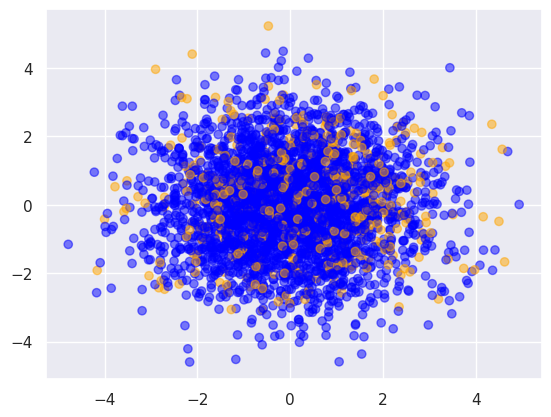

In [8]:
plt.scatter(
    pca_repr[:, 0],
    pca_repr[:, 1],
    c=df["Churn"].map({False: "blue", True: "orange"}),
    alpha=0.5,
);

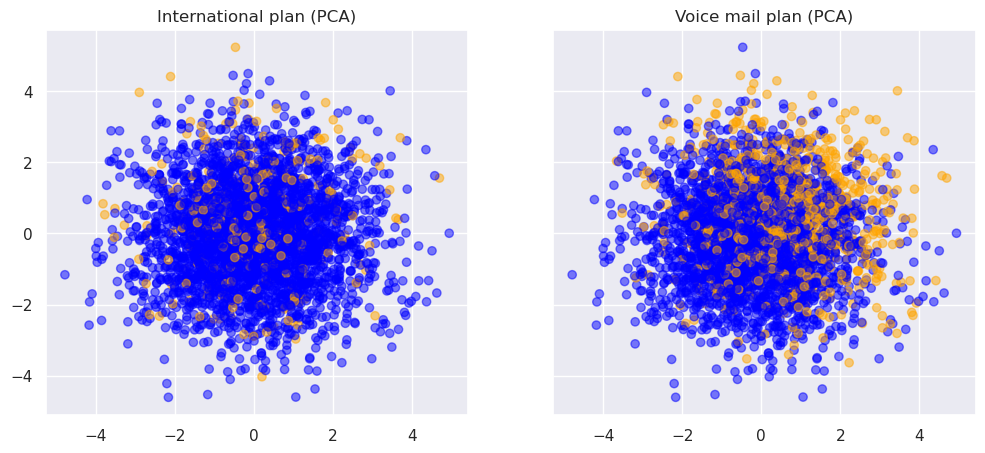

In [9]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        pca_repr[:, 0],
        pca_repr[:, 1],
        c=df[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name + " (PCA)");

In [10]:
from sklearn.decomposition import KernelPCA

In [11]:
rbf_kpca = KernelPCA(kernel="rbf", gamma=0.01)
rbf_kpca_repr = rbf_kpca.fit_transform(X_scaled)

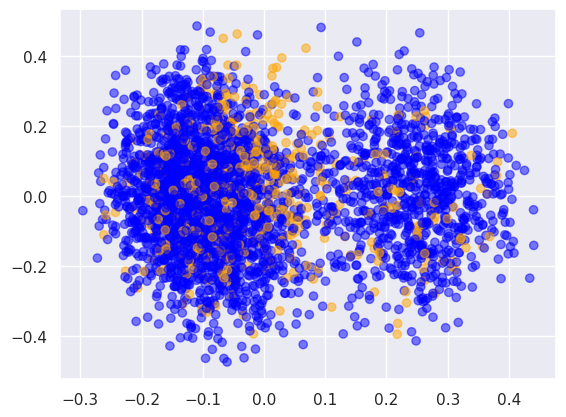

In [12]:
plt.scatter(
    rbf_kpca_repr[:, 0],
    rbf_kpca_repr[:, 1],
    c=df["Churn"].map({False: "blue", True: "orange"}),
    alpha=0.5,
);

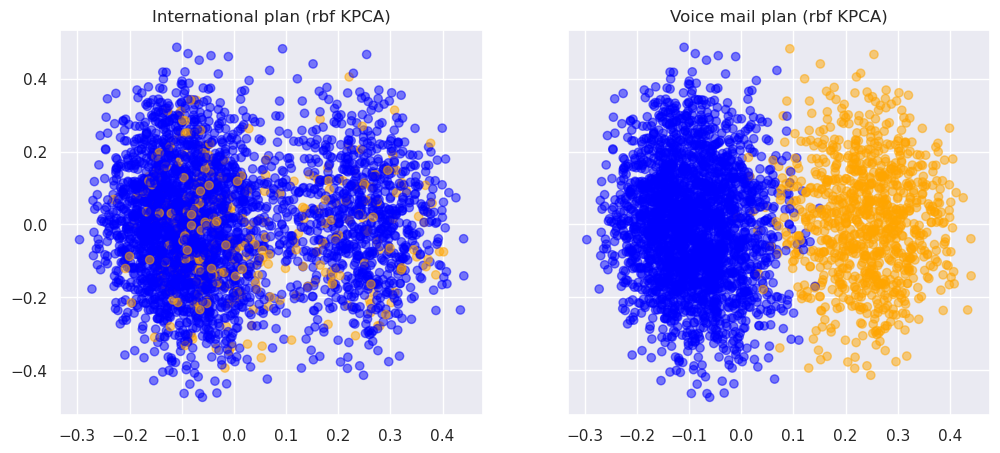

In [13]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        rbf_kpca_repr[:, 0],
        rbf_kpca_repr[:, 1],
        c=df[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name + " (rbf KPCA)");

In [14]:
poly_kpca = KernelPCA(kernel="poly", gamma=0.05, degree=5)
poly_kpca_repr = poly_kpca.fit_transform(X_scaled)

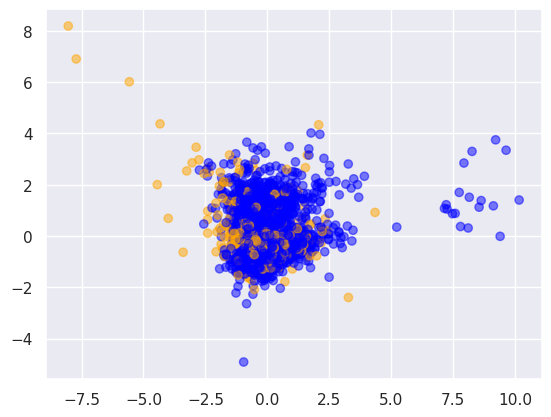

In [15]:
plt.scatter(
    poly_kpca_repr[:, 0],
    poly_kpca_repr[:, 1],
    c=df["Churn"].map({False: "blue", True: "orange"}),
    alpha=0.5,
);

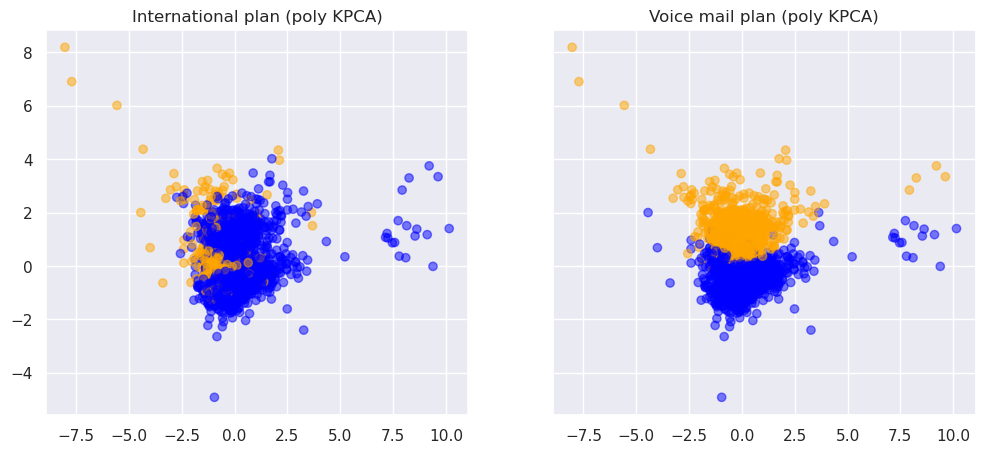

In [16]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        poly_kpca_repr[:, 0],
        poly_kpca_repr[:, 1],
        c=df[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name + " (poly KPCA)");

In [17]:
from sklearn.manifold import TSNE

In [18]:
tsne = TSNE(random_state=228)
tsne_repr = tsne.fit_transform(X_scaled)

/home/timur/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/timur/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


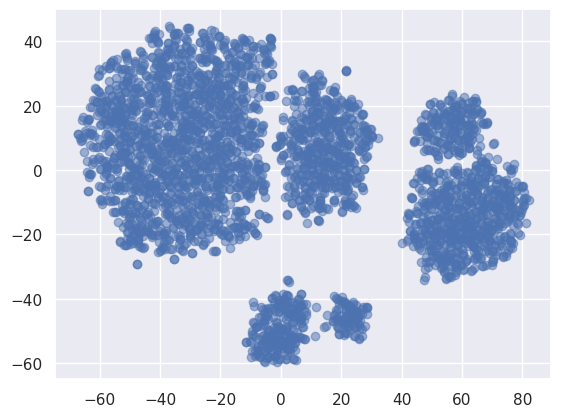

In [19]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

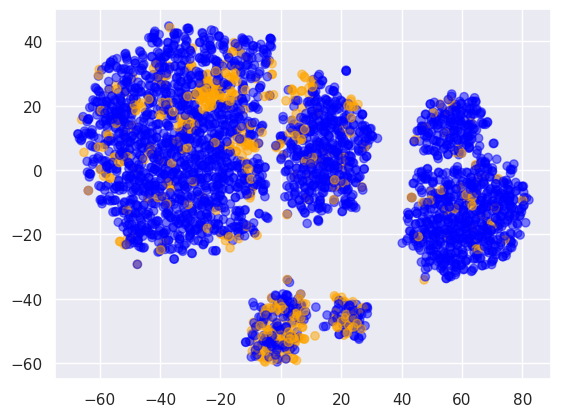

In [20]:
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=df["Churn"].map({False: "blue", True: "orange"}),
    alpha=0.5,
);

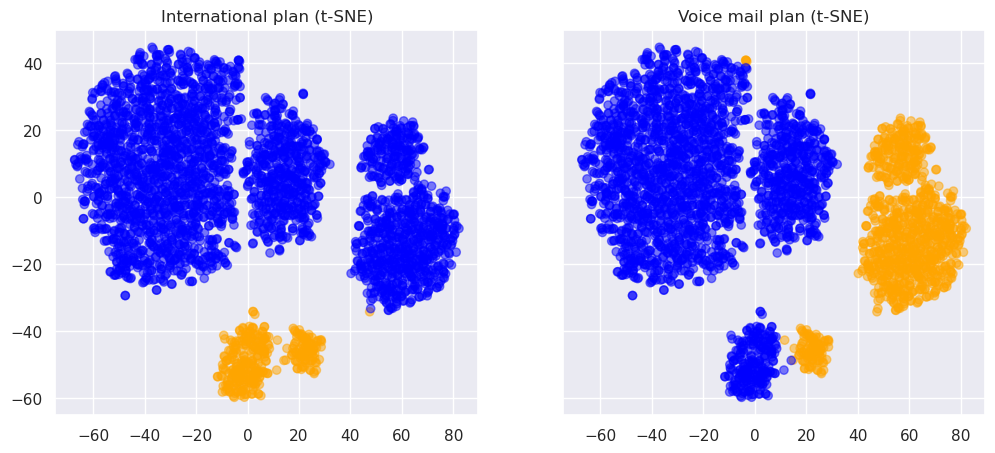

In [21]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=df[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name + " (t-SNE)");
